<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: Mariya Mansurova, Analyst & developer in Yandex.Metrics team. Translated by Ivan Zakharov, ML enthusiast. <br>This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #9 (demo)
## <center> Time series analysis

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [35]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)
    

3.10.0


## Data preparation

In [36]:
df = pd.read_csv('data/wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df.head()

date  count lang              page  rank   month             title
81  2015-01-01   1414   en  Machine_learning  8708  201501  Machine_learning
80  2015-01-02   1920   en  Machine_learning  8708  201501  Machine_learning
79  2015-01-03   1338   en  Machine_learning  8708  201501  Machine_learning
78  2015-01-04   1404   en  Machine_learning  8708  201501  Machine_learning
77  2015-01-05   2264   en  Machine_learning  8708  201501  Machine_learning

In [37]:
df.shape

(383, 7)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [38]:
df.date = pd.to_datetime(df.date)

In [39]:
plotly_df(df.set_index('date')[['count']], title = 'Number of Wiki views from January 2015 to January 2016')

Implements a procedure for **forecasting time series data** based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-part-3-predicting-the-future-with-facebook-prophet-3f3af145cdc

In [40]:
from fbprophet import Prophet

In [41]:
df = df[['date', 'count']]

In [42]:
predictions = 30
df.columns = ['ds', 'y']

In [43]:
question = np.datetime64('2016-01-20')
df.loc[df['ds']==question]

ds     y
372 2016-01-20  3559

**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- 3426**
- 5229
- 2744

In [44]:
#всё минус предикшнс
train_df = df[:-predictions].copy()

In [45]:
m = Prophet()
m.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
prophet = Prophet()
prophet.fit(train_df)
future = prophet.make_future_dataframe(periods=predictions) #зачем это?
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
378 2016-01-16
379 2016-01-17
380 2016-01-18
381 2016-01-19
382 2016-01-20

In [47]:
forecast = prophet.predict(future)
forecast.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2015-01-01  2166.175133  2115.782289  2907.968571  2166.175133  2166.175133   
1 2015-01-02  2168.913922  1754.745364  2570.697155  2168.913922  2168.913922   
2 2015-01-03  2171.652710   924.334330  1706.272808  2171.652710  2171.652710   
3 2015-01-04  2174.391498  1045.040390  1871.671912  2174.391498  2174.391498   
4 2015-01-05  2177.130286  2065.552695  2828.867183  2177.130286  2177.130286   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0      327.023290            327.023290            327.023290  327.023290   
1        7.049981              7.049981              7.049981    7.049981   
2     -861.705963           -861.705963           -861.705963 -861.705963   
3     -720.723603           -720.723603           -720.723603 -720.723603   
4      281.348408            281.348408            281.348408  281.348408   

   weekly_lower  weekly_upper  multiplicative_terms  \
0    327.023290    327.023290                   0.0   
1      7.049981      7.049981                   0.0   
2   -861.705963   -861.705963                   0.0   
3   -720.723603   -720.723603                   0.0   
4    281.348408    281.348408                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  2493.198423  
1                         0.0                         0.0  2175.963903  
2                         0.0                         0.0  1309.946747  
3                         0.0                         0.0  1453.667895  
4                         0.0                         0.0  2458.478694

In [48]:
forecast.loc[forecast['ds']==question]

ds        trend   yhat_lower   yhat_upper  trend_lower  \
382 2016-01-20  3002.104708  3011.071092  3812.964069   2973.97109   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
382  3025.008055      425.562161            425.562161            425.562161   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
382  425.562161    425.562161    425.562161                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
382                         0.0                         0.0  3427.66687

In [49]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

In [50]:
#cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df['y'])

In [51]:
cmp_df.head()

yhat   yhat_lower   yhat_upper     y
ds                                                     
2015-01-01  2493.198423  2115.782289  2907.968571  1414
2015-01-02  2175.963903  1754.745364  2570.697155  1920
2015-01-03  1309.946747   924.334330  1706.272808  1338
2015-01-04  1453.667895  1045.040390  1871.671912  1404
2015-01-05  2458.478694  2065.552695  2828.867183  2264

In [52]:
#ошибка
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
#ошибка на факт. значение
cmp_df['p'] =cmp_df['e'] / cmp_df['y']

pred_df = cmp_df[-predictions:]

In [53]:
mape = round(np.mean(abs(pred_df['p']))*100, 2)
print(f'Mean Absolute Percentage Error = {mape}%') #measure of prediction accuracy because it expresses error as a percentage and thus can be used in model evaluations on different datasets
print('Mean Absolute Error = ', round(np.mean(abs(pred_df['e'])), 2))

Mean Absolute Percentage Error = 34.55%
Mean Absolute Error =  600.79


Estimate the quality of the prediction with the last 30 points.

**<font color='red'>Question 2:</font> What is MAPE equal to?**

- 34.5
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- 600
- 903

## Predicting with Autoregressive Integrated Moving Average

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- Series is not stationary, p_value = 0.107**
- Series is stationary, p_value = 0.001
- Series is not stationary, p_value = 0.001

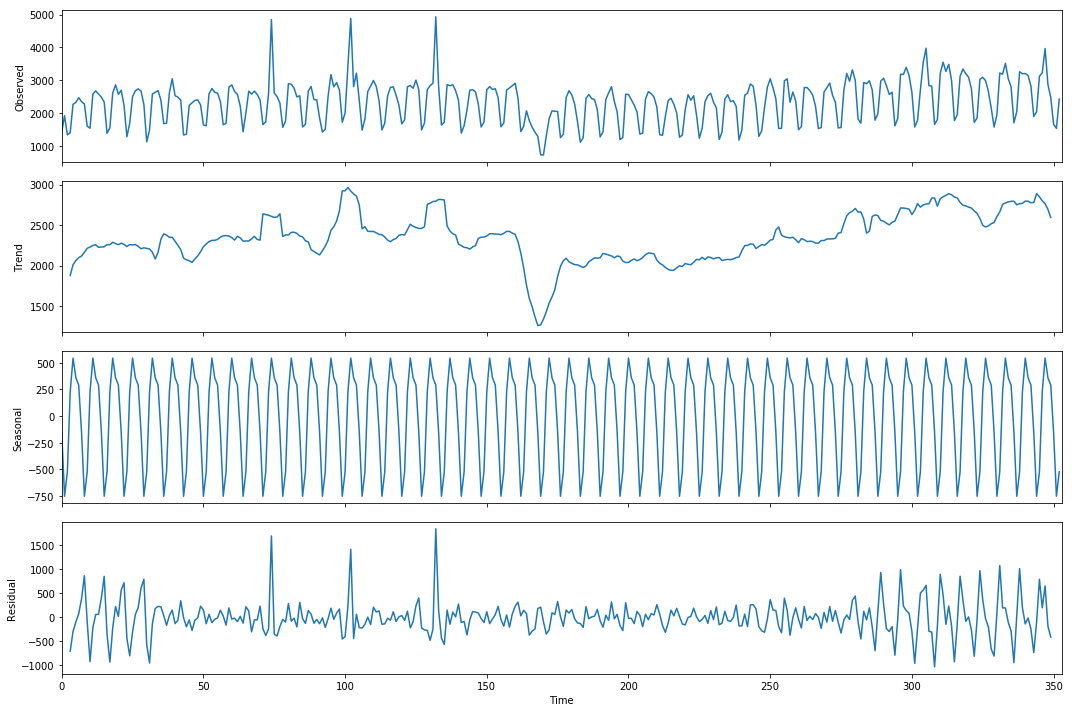

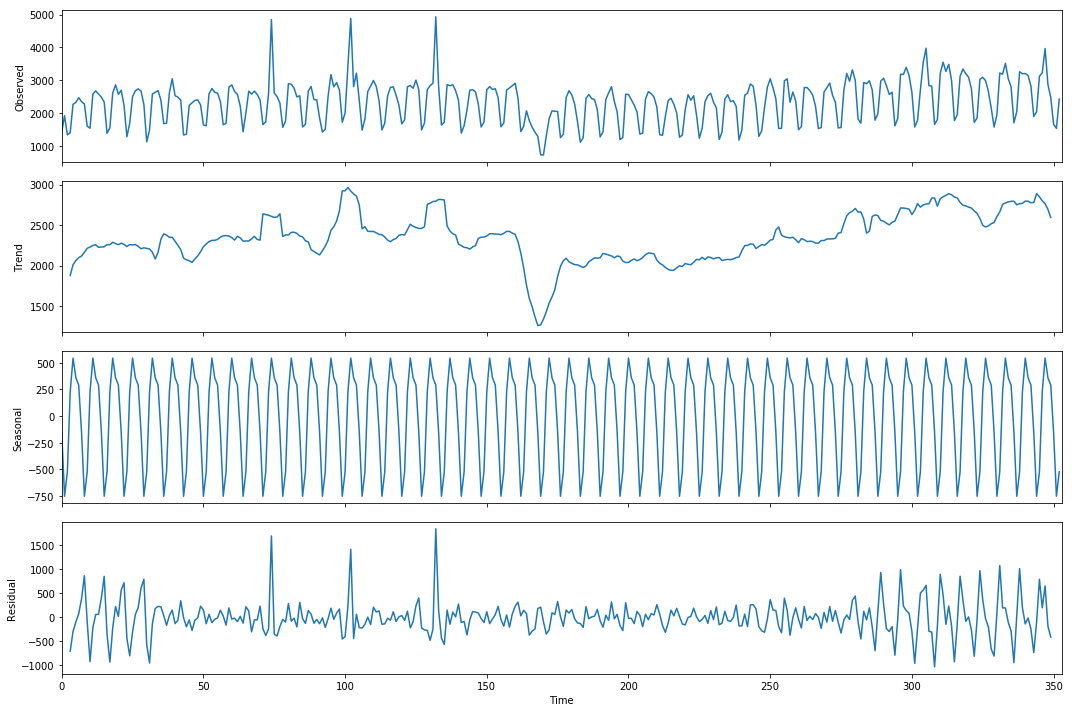

In [55]:
#tsa = time series analysis
sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot()

In [56]:
print("Dickey-Fuller test: p MacKinnon's =%f" % sm.tsa.stattools.adfuller(train_df['y'])[1])

Dickey-Fuller test: p MacKinnon's =0.107392


In [57]:
sm.tsa.stattools.adfuller(train_df['y'])

(-2.5341178434183047,
 0.10739219627612018,
 15,
 337,
 {'1%': -3.4499043309021955,
  '5%': -2.870154885338925,
  '10%': -2.5713597190254385},
 4878.896813791136)

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

In [58]:
#SARIMAX model:(p,d,q)(sp,sd,sq,s) +exog

In [59]:
ps = range(0, 2)
ds = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Ds = range(0, 3)
Qs = range(0, 2)

In [60]:
from itertools import product

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

384

In [64]:
%%time
import warnings
from tqdm import tqdm
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

100%|████████████████████████████████████████████████████████████████████████████████| 384/384 [05:27<00:00,  1.17it/s]


             parameters          aic
137  (0, 1, 2, 3, 2, 1)  4961.632628
269  (1, 1, 1, 3, 2, 1)  4962.828814
159  (0, 1, 3, 3, 2, 1)  4969.534604
180  (1, 0, 0, 3, 2, 1)  4973.212241
76   (0, 0, 3, 3, 2, 1)  4978.036900
Wall time: 5min 27s


In [63]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

NameError: name 'results' is not defined

In [ ]:
result_table2[result_table2['parameters'].isin([(1, 0, 2, 3, 1, 0),
                                                (1, 1, 2, 3, 2, 1),
                                                (1, 1, 2, 3, 1, 1),
                                                (1, 0, 2, 3, 0, 0)])].sort_values(by='aic')

In [ ]:
print(best_model.summary())